In [1]:
import pandas as pd
import ast
import warnings
from pandas import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

In [2]:
import matplotlib.pyplot as plt

# Setting the default figure parameters to de-frame the upper x-axis, left y-axis, and right y-axis
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['ytick.left'] = False
plt.rcParams['axes.grid'] = True  # Ensure grid lines are enabled
plt.rcParams['axes.grid.which'] = 'major'  # Apply grid lines only to major ticks
plt.rcParams['axes.grid.axis'] = 'y'  # Only show horizontal grid lines
plt.rcParams['grid.linestyle'] = '--'  # Set grid line style to dashed
plt.rcParams['grid.alpha'] = 0.3  # Set grid line transparency

In [11]:
count_biennale=pd.read_csv('../data/arts_long_df_process/count_biennale.csv',low_memory=False)

In [12]:
count_biennale.head()

,year,total_artist_count,total_institutions_count
0,1895,279.0,1
1,1897,443.0,1
2,1899,419.0,1
3,1901,359.0,1
4,1903,327.0,1


In [20]:
data=count_biennale.copy()[:-1]

In [21]:
data.tail()

,year,total_artist_count,total_institutions_count
92,2018,8062.0,132
93,2019,9027.0,113
94,2020,3572.0,65
95,2021,8485.0,117
96,2022,6702.0,88


In [42]:
df

,year,total_artist_count,total_institutions_count,total_artist_count_ma,total_institutions_count_ma
0,1895,279.0,1,NaN,NaN
1,1897,443.0,1,NaN,NaN
2,1899,419.0,1,380.333333,1.000000
3,1901,359.0,1,407.000000,1.000000
4,1903,327.0,1,368.333333,1.000000
5,1905,544.0,1,410.000000,1.000000
6,1907,593.0,1,488.000000,1.000000
7,1909,574.0,1,570.333333,1.000000
8,1910,607.0,1,591.333333,1.000000
9,1912,552.0,1,577.666667,1.000000


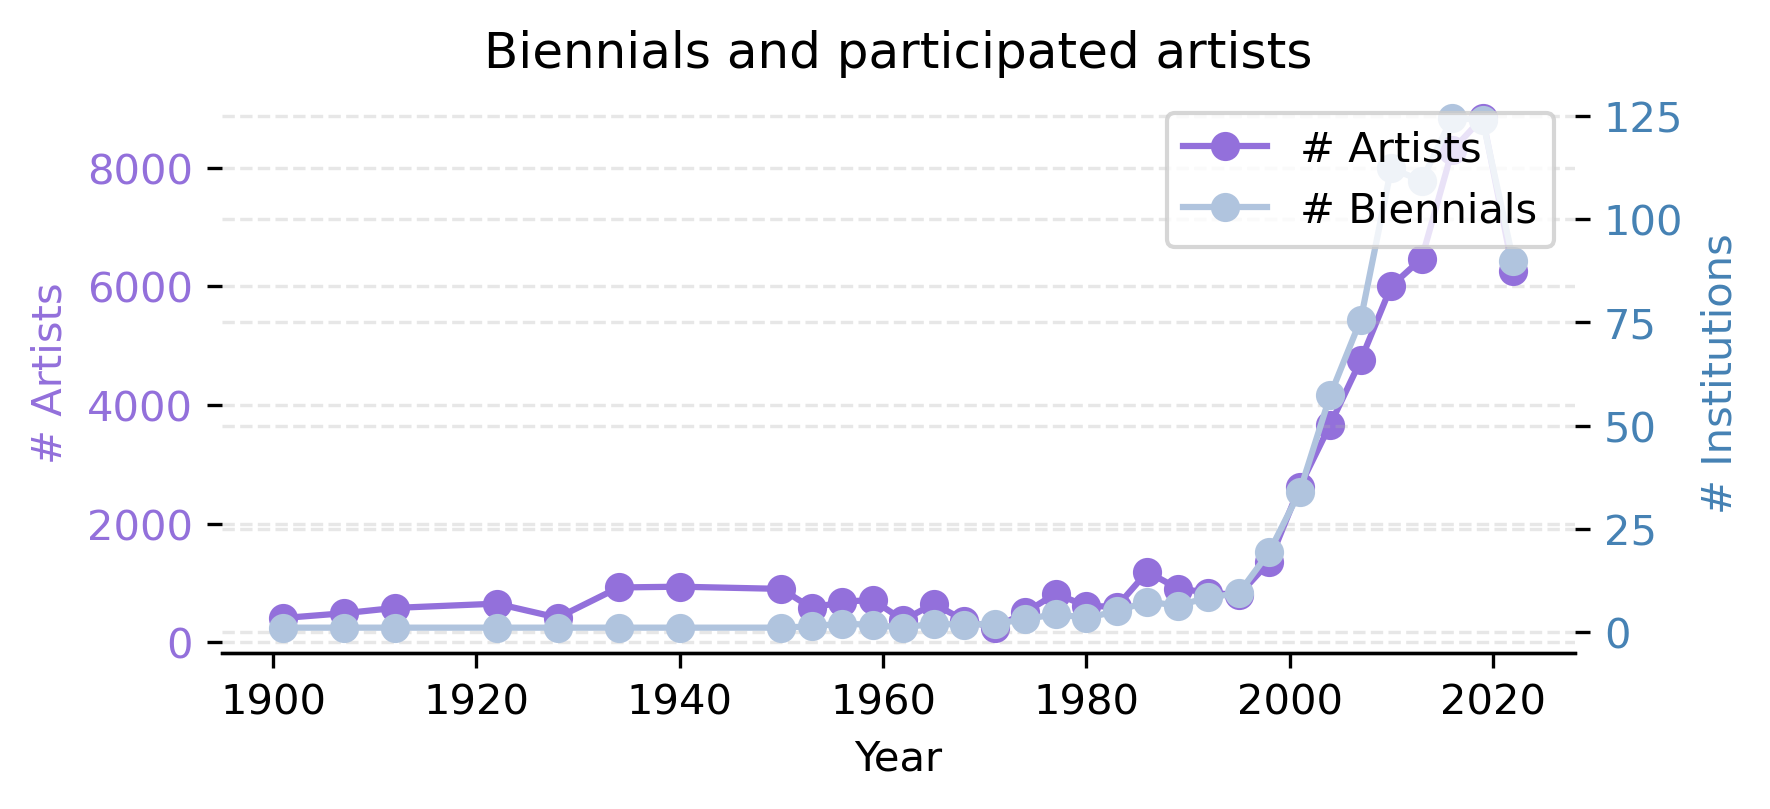

In [41]:
df = pd.DataFrame(data)

# Calculate moving averages
df['total_artist_count_ma'] = df['total_artist_count'].rolling(window=3).mean()
df['total_institutions_count_ma'] = df['total_institutions_count'].rolling(window=3).mean()

# Create the figure and the axes
fig, ax1 = plt.subplots(figsize=(6, 2.8), dpi=300)

# Plotting total_artist_count with moving average
ax1.plot(df['year'][::3], df['total_artist_count_ma'][::3], '-o',color='mediumpurple', label='# Artists')
ax1.set_xlabel('Year')
ax1.set_ylabel('# Artists', color='mediumpurple')
ax1.tick_params(axis='y', labelcolor='mediumpurple')

# Creating a second y-axis for total_institutions_count
ax2 = ax1.twinx()
ax2.plot(df['year'][::3], df['total_institutions_count_ma'][::3], '-o', color='lightsteelblue', label='# Biennials')
ax2.set_ylabel('# Institutions', color='steelblue')
ax2.tick_params(axis='y', labelcolor='steelblue')

# Adding a title and a legend
plt.title('Biennials and participated artists')
fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)
fig.tight_layout()  # Adjust layout to not cut off labels

# Show the plot
plt.show()

In [8]:
artfacts_new=pd.read_csv('../data/arts_long_df/artfacts_full_good.csv',low_memory=False)
artfacts_new.dropna(axis = 0, subset='id', inplace = True)

In [9]:
artfacts_new.shape

(8414554, 44)

In [106]:
artfacts_new.value_counts('type')

type
S    717920
G    307556
F      4837
B      2628
dtype: int64

In [7]:
artfacts_new.head()

,Unnamed: 0,title,date,description,category,price_currency,availability,href,id,listPrice.__typename,listPrice.major,listPrice.currencyCode,image.small,image.large,partner.name,partner.href,partner.profile.image.small,partner.profile.image.large,partner.profile.id,partner.id,artsy_id,internalID,dimension_text,organization,mediumText,categoryText,date_text,saleDate,boughtIn,currency,location,lotNumber,saleTitle,isUpcoming,artist.name,artist.id,images.thumbnail.cropped.src,images.thumbnail.cropped.width,images.thumbnail.cropped.height,price_realized.display,price_realized.display_usd,price_realized.cents_usd,performance.mid,estimate.display
0,0,Inside Me,2021,NaN,Painting,USD,for sale,/artwork/alessandro-casetti-inside-me,QXJ0d29yazo2MjIwODAyYWIxNjI2MzAwMGJkN2U3M2U=,Money,3500.0,USD,https://d32dm0rphc51dk.cloudfront.net/gKeTg6oS...,https://d32dm0rphc51dk.cloudfront.net/gKeTg6oS...,Artspace Warehouse,/partner/artspace-warehouse,https://d32dm0rphc51dk.cloudfront.net/thjvHbxF...,https://d32dm0rphc51dk.cloudfront.net/thjvHbxF...,UHJvZmlsZTo1MjU4NzgyZThiM2I4MTdiMzYwMDBlODE=,UGFydG5lcjo1MjU4NzgyZThiM2I4MTdiMzYwMDBlN2Y=,alessandro-casetti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Looking Beyond,2021,NaN,Painting,USD,for sale,/artwork/alessandro-casetti-looking-beyond,QXJ0d29yazo2MjQ1YTcwZmQ2YmVjYTAwMGRhZDFiNWU=,Money,5800.0,USD,https://d32dm0rphc51dk.cloudfront.net/FCkcWyI9...,https://d32dm0rphc51dk.cloudfront.net/FCkcWyI9...,Artspace Warehouse,/partner/artspace-warehouse,https://d32dm0rphc51dk.cloudfront.net/thjvHbxF...,https://d32dm0rphc51dk.cloudfront.net/thjvHbxF...,UHJvZmlsZTo1MjU4NzgyZThiM2I4MTdiMzYwMDBlODE=,UGFydG5lcjo1MjU4NzgyZThiM2I4MTdiMzYwMDBlN2Y=,alessandro-casetti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Dreaming,2021,NaN,Painting,USD,for sale,/artwork/alessandro-casetti-dreaming,QXJ0d29yazo2MjRmZGI1YWJjYzQ1MTAwMGNkYmMwZWI=,Money,3500.0,USD,https://d32dm0rphc51dk.cloudfront.net/2VrkMJX0...,https://d32dm0rphc51dk.cloudfront.net/2VrkMJX0...,Artspace Warehouse,/partner/artspace-warehouse,https://d32dm0rphc51dk.cloudfront.net/thjvHbxF...,https://d32dm0rphc51dk.cloudfront.net/thjvHbxF...,UHJvZmlsZTo1MjU4NzgyZThiM2I4MTdiMzYwMDBlODE=,UGFydG5lcjo1MjU4NzgyZThiM2I4MTdiMzYwMDBlN2Y=,alessandro-casetti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Ancestral Memories,2023,NaN,Painting,USD,for sale,/artwork/alessandro-casetti-ancestral-memories,QXJ0d29yazo2NDZjZDBlZWQ5MDIzZjAwMGI3MzFmM2E=,Money,2750.0,USD,https://d32dm0rphc51dk.cloudfront.net/GqxD0qyS...,https://d32dm0rphc51dk.cloudfront.net/GqxD0qyS...,Artspace Warehouse,/partner/artspace-warehouse,https://d32dm0rphc51dk.cloudfront.net/thjvHbxF...,https://d32dm0rphc51dk.cloudfront.net/thjvHbxF...,UHJvZmlsZTo1MjU4NzgyZThiM2I4MTdiMzYwMDBlODE=,UGFydG5lcjo1MjU4NzgyZThiM2I4MTdiMzYwMDBlN2Y=,alessandro-casetti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Luna,2023,NaN,Painting,USD,for sale,/artwork/alessandro-casetti-luna,QXJ0d29yazo2NDZjZDBlZjQ3ZjEzODAwMGRlMGQxNmM=,Money,5800.0,USD,https://d32dm0rphc51dk.cloudfront.net/Ffc5PGQl...,https://d32dm0rphc51dk.cloudfront.net/Ffc5PGQl...,Artspace Warehouse,/partner/artspace-warehouse,https://d32dm0rphc51dk.cloudfront.net/thjvHbxF...,https://d32dm0rphc51dk.cloudfront.net/thjvHbxF...,UHJvZmlsZTo1MjU4NzgyZThiM2I4MTdiMzYwMDBlODE=,UGFydG5lcjo1MjU4NzgyZThiM2I4MTdiMzYwMDBlN2Y=,alessandro-casetti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
b=artfacts_new[artfacts_new['type']=='B']

KeyError: 'type'

In [12]:
biennale_artist=pd.read_csv('../data/arts_long_df_process/biennale_artist_match.csv')
biennale_artist['artist_id']=biennale_artist['artist_url'].apply(lambda x: int(x.split('/')[-1]))
biennale_artist.head()

,year,artist_url,artist_id
0,2022,https://artfacts.net/artist/ignasi-aballi/17201,17201
1,2022,https://artfacts.net/artist/francis-nathan-abi...,880733
2,2022,https://artfacts.net/artist/kevin-abosch/244634,244634
3,2022,https://artfacts.net/artist/noor-abuarafeh/468135,468135
4,2022,https://artfacts.net/artist/carla-accardi/2093,2093


In [48]:
biennale_artist.shape

(27763, 3)

In [20]:
len(list(set(biennale_artist.artist_url)))

15596

In [7]:
artfacts_we=artfacts_new[(~artfacts_new.venue_links_profile.isna())&(artfacts_new.venue_links_profile!='[]')]
artfacts_we=artfacts_we[(~artfacts_new.artists.isna())&(artfacts_new.artists!='[]')]
artfacts_we=artfacts_we[(~artfacts_new.end_date.isna())&(artfacts_new.end_date!='[]')]

In [22]:
artfacts_we.shape

(1030468, 37)

In [96]:
artfacts_we.value_counts('type')

type
S    717585
G    307434
F      2835
B      2614
dtype: int64

In [39]:
min(a)

1986

In [8]:
biennale_artist1=biennale_artist.copy()
biennale_artist1['c']=1
biennale_gp=biennale_artist1.groupby('artist_id').agg({'year':'min','c':'count'}).reset_index()

In [119]:
biennale_gp.tail()

,artist_id,year,c
15591,886948,1948,1
15592,903456,2022,1
15593,903457,2022,1
15594,903458,2022,1
15595,903459,2022,1


In [9]:
biennale_pp=biennale_gp.copy()
biennale_pp_sub=biennale_pp[biennale_pp.year>=1986]
biennale_pp1=biennale_pp_sub[biennale_pp_sub.c==1]
biennale_pp.shape

(15596, 3)

In [135]:
biennale_pp1.shape

(3947, 3)

In [57]:
biennale_pp.head()

,artist_id,year,c
0,19,2001,1
2,26,1990,1
3,29,1990,1
4,36,1990,1
6,40,1990,1


In [58]:
artfacts_new.head()

,id,type,title,venue_name,venue_address,venue_links_profile,venue_links_card,venue_city,venue_country,venue_coordinates,city_id,city_name,city_links_profile,city_links_card,country_id,country_name,country_links_profile,country_links_card,institution_id,institution_name,institution_links_profile,institution_links_card,curators,artists,links_profile,links_card,links_image,links_preview,links_thumb,begin_date,end_date,description,caption,events,artist_count,follower_count,exhibitors
0,962424,S,Nikita Gale - Thank God You're Here,56 Henry,Henry Street 56,https://artfacts.net/institution/56-henry/37970,/institution/56-henry/37970,"New York City, NY",United States,"[-73.9951749, 40.712776250000005]",59.0,"New York City, NY",https://artfacts.net/city/new-york-city-ny/59,/city/new-york-city-ny/59,18.0,United States,https://artfacts.net/country/united-states/18,/country/united-states/18,37970.0,56 Henry,https://artfacts.net/institution/56-henry/37970,/institution/56-henry/37970,[],"[{'id': '329449', 'name': 'Nikita Gale', 'firs...",https://artfacts.net/exhibition/nikita-gale-th...,/exhibition/nikita-gale-thank-god-you-re-here/...,https://images.artfacts.net/exhibpics/962424.jpg,https://images.artfacts.net/exhibpics/preview/...,https://images.artfacts.net/exhibpics/thumbs/9...,2021-02-05,2021-03-25,NaN,NaN,[],1.0,0.0,[]
1,892779,F,Paris Internationale 2019,NaN,Rue Alfred de Vigny 16,https://artfacts.net/institution/paris-interna...,/institution/paris-internationale/34270,Paris,France,"[2.3051751, 48.8793634]",63.0,Paris,https://artfacts.net/city/paris/63,/city/paris/63,15.0,France,https://artfacts.net/country/france/15,/country/france/15,34270.0,Paris Internationale,https://artfacts.net/institution/paris-interna...,/institution/paris-internationale/34270,[],"[{'id': '250379', 'name': 'Stijn Ank', 'first_...",https://artfacts.net/exhibition/paris-internat...,/exhibition/paris-internationale-2019/892779,https://images.artfacts.net/exhibpics/892779.jpg,https://images.artfacts.net/exhibpics/preview/...,https://images.artfacts.net/exhibpics/thumbs/8...,2019-10-16,2019-10-20,The 5th edition of Paris Internationale takes ...,NaN,[],6.0,0.0,"[{'id': '26426', 'name': 'Carlos/Ishikawa', 'l..."
2,943811,G,Award Winners,In The Gallery,Dronningens Tværgade 19,https://artfacts.net/institution/in-the-galler...,/institution/in-the-gallery-copenhagen/29455,Copenhagen,Denmark,"[12.586623, 55.683642]",19.0,Copenhagen,https://artfacts.net/city/copenhagen/19,/city/copenhagen/19,8.0,Denmark,https://artfacts.net/country/denmark/8,/country/denmark/8,29455.0,In The Gallery Copenhagen,https://artfacts.net/institution/in-the-galler...,/institution/in-the-gallery-copenhagen/29455,[],"[{'id': '39857', 'name': 'Andrew Moore', 'firs...",https://artfacts.net/exhibition/award-winners/...,/exhibition/award-winners/943811,https://images.artfacts.net/exhibpics/943811.jpg,https://images.artfacts.net/exhibpics/preview/...,https://images.artfacts.net/exhibpics/thumbs/9...,2018-08-09,2018-09-29,"In The Gallery presents AWARD WINNERS, a show ...",NaN,[],8.0,0.0,[]
3,900324,S,Jacob Raupach - Fell,Wagga Wagga Civic Center,Cnr Baylis & Morrow Streets,https://artfacts.net/institution/wagga-wagga-a...,/institution/wagga-wagga-art-gallery/8667,"Wagga Wagga, NSW",Australia,NaN,1623.0,"Wagga Wagga, NSW",https://artfacts.net/city/wagga-wagga-nsw/1623,/city/wagga-wagga-nsw/1623,22.0,Australia,https://artfacts.net/country/australia/22,/country/australia/22,8667.0,Wagga Wagga Art Gallery,https://artfacts.net/institution/wagga-wagga-a...,/institution/wagga-wagga-art-gallery/8667,[],"[{'id': '483030', 'name': 'Jacob Raupach', 'fi...",https://artfacts.net/exhibition/jacob-raupach-...,/exhibition/jacob-raupach-fell/900324,https://images.artfacts.net/exhibpics/900324.jpg,https://images.artfacts.net/exhibpics/preview/...,https://images.artfacts.net/exhibpics/thumbs/9...,2015-11-21,2016-01-10,Fell is a continued investigation into underst...,"Jacob Raupach,\nPine Clearing2015, archival in...",[]

In [10]:
artfacts_we=artfacts_new[(~artfacts_new.venue_links_profile.isna())&(artfacts_new.venue_links_profile!='[]')]
artfacts_we=artfacts_we[(~artfacts_new.artists.isna())&(artfacts_new.artists!='[]')]
artfacts_we=artfacts_we[(~artfacts_new.end_date.isna())&(artfacts_new.end_date!='[]')]
artfacts_we['end_year']=artfacts_we['end_date'].apply(lambda x: int(x.split('-')[0]))

In [109]:
min(artfacts_we.end_year)

1829

In [11]:
artfacts_we1=artfacts_we.copy()
artfacts_we1['artists'] = artfacts_we1['artists'].apply(lambda x: eval(x) if isinstance(x, str) else x)
exploded_artists = artfacts_we1.explode('artists')
normalized_artists = json_normalize(exploded_artists['artists'])
normalized_artists = normalized_artists.add_prefix('artist_')
result = pd.concat([exploded_artists.reset_index(drop=True), normalized_artists], axis=1)
result = result.drop('artists', axis=1)

In [111]:
result.shape

(3769092, 53)

In [112]:
result.to_csv('../data/arts_long_df_process/artfacts_artists_all.csv',header=True,index=False)

In [2]:
all_exh=pd.read_csv('../data/arts_long_df_process/artfacts_artists_all.csv')

In [3]:
import matplotlib.pyplot as plt

# Setting the default figure parameters to de-frame the upper x-axis, left y-axis, and right y-axis
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['ytick.left'] = False
plt.rcParams['axes.grid'] = True  # Ensure grid lines are enabled
plt.rcParams['axes.grid.which'] = 'major'  # Apply grid lines only to major ticks
plt.rcParams['axes.grid.axis'] = 'y'  # Only show horizontal grid lines
plt.rcParams['grid.linestyle'] = '--'  # Set grid line style to dashed
plt.rcParams['grid.alpha'] = 0.3  # Set grid line transparency

In [4]:
all_exh['end_year']=all_exh['end_date'].apply(lambda x: x.split('-')[0])

In [5]:
a=all_exh[['artist_id','end_year']].groupby('artist_id').min().reset_index()
b=all_exh[['artist_id','end_year']].groupby('artist_id').max().reset_index()

In [6]:
all_exh_biennale.head()

NameError: name 'all_exh_biennale' is not defined

In [13]:
all_exh_biennale=all_exh[all_exh.artist_id.isin(biennale_artist.artist_id)]

a1=all_exh_biennale[['artist_id','end_year']].groupby('artist_id').min().reset_index()
b1=all_exh_biennale[['artist_id','end_year']].groupby('artist_id').max().reset_index()

In [14]:
c.head()

NameError: name 'c' is not defined

In [15]:
c=pd.merge(a,b,on='artist_id',how='inner')
c=c.dropna()
c['end_year_y']=c['end_year_y'].astype(int)
c['end_year_x']=c['end_year_x'].astype(int)
c['career_length']=c['end_year_y']-c['end_year_x']+1
c=c[c.career_length>0]

In [16]:
c1=pd.merge(a1,b1,on='artist_id',how='inner')
c1=c1.dropna()
c1['end_year_y']=c1['end_year_y'].astype(int)
c1['end_year_x']=c1['end_year_x'].astype(int)
c1['career_length']=c1['end_year_y']-c1['end_year_x']+1
c1=c1[c1.career_length>0]

In [ ]:
import seaborn as sns

In [ ]:
c.head()

In [ ]:
binned_counts

In [18]:
df=c.copy()

In [19]:
import numpy as np

# Since we have a small data sample, for demonstration purposes we'll use it directly for log-binning.
# However, in practice, log-binning should be used on a larger dataset for meaningful results.

# We will create bins with edges that increase logarithmically.
# First, find the range of career lengths
min_length = df['career_length'].min()
max_length = df['career_length'].max()

# Create log-spaced bins from min to max career length
bins = np.logspace(np.log10(min_length), np.log10(max_length), num=10)

# Use the bins to calculate the histogram
hist, edges = np.histogram(df['career_length'], bins=bins)

# Calculate the width of each bin for normalization
bin_width = np.diff(edges)

# Normalize by the bin width to get a probability density
probability_density = hist  / len(df)
bin_centers = edges[:-1] + np.log10(bin_width)/2



In [107]:
edges

array([  1.        ,   1.79963745,   3.23869494,   5.82847668,
        10.48914489,  18.87665792,  33.97114045,  61.13573643,
       110.02216055, 198.        ])

In [106]:
np.log10(bin_width)/2

array([-0.04855344,  0.07903907,  0.20663158,  0.33422409,  0.4618166 ,
        0.58940911,  0.71700163,  0.84459414,  0.97218665])

In [104]:
10**(np.log10(edges[:-1]) + np.log10(bin_width)/2)

array([8.94224494e-01, 2.15885808e+00, 5.21196661e+00, 1.25828540e+01,
       3.03778259e+01, 7.33388710e+01, 1.77056450e+02, 4.27453900e+02,
       1.03196939e+03])

In [69]:
sum(probability_density[6:])

0.0011541781908123248

In [105]:
bins

array([  1.        ,   1.79963745,   3.23869494,   5.82847668,
        10.48914489,  18.87665792,  33.97114045,  61.13573643,
       110.02216055, 198.        ])

In [77]:
probability_density2

array([0.17635077, 0.01318594, 0.00686424, 0.01150699, 0.01405027,
       0.01486029, 0.00758091, 0.00362819, 0.0004904 ])

In [81]:
probability_density2[1:]

array([0.01318594, 0.00686424, 0.01150699, 0.01405027, 0.01486029,
       0.00758091, 0.00362819, 0.0004904 ])

In [96]:
sum(probability_density[5:])

0.1034273060568867

In [101]:
sum(probability_density2[5:])

0.6507540197742935

In [90]:
sum(probability_density)

0.9999984080514389

In [99]:
sum(probability_density2)

1.0

In [80]:
1-sum(probability_density2[1:])

0.9278327647498434

In [102]:
bins

array([  1.        ,   1.79963745,   3.23869494,   5.82847668,
        10.48914489,  18.87665792,  33.97114045,  61.13573643,
       110.02216055, 198.        ])

In [103]:
bin_centers

array([8.94224494e-01, 2.15885808e+00, 5.21196661e+00, 1.25828540e+01,
       3.03778259e+01, 7.33388710e+01, 1.77056450e+02, 4.27453900e+02,
       1.03196939e+03])

In [9]:
import numpy as np

In [20]:
# Use the bins to calculate the histogram
hist2, edges2 = np.histogram(c1['career_length'], bins=bins)

# Calculate the width of each bin for normalization
bin_width2 = np.diff(edges2)

# Normalize by the bin width to get a probability density
probability_density2 = hist2 / len(c1)

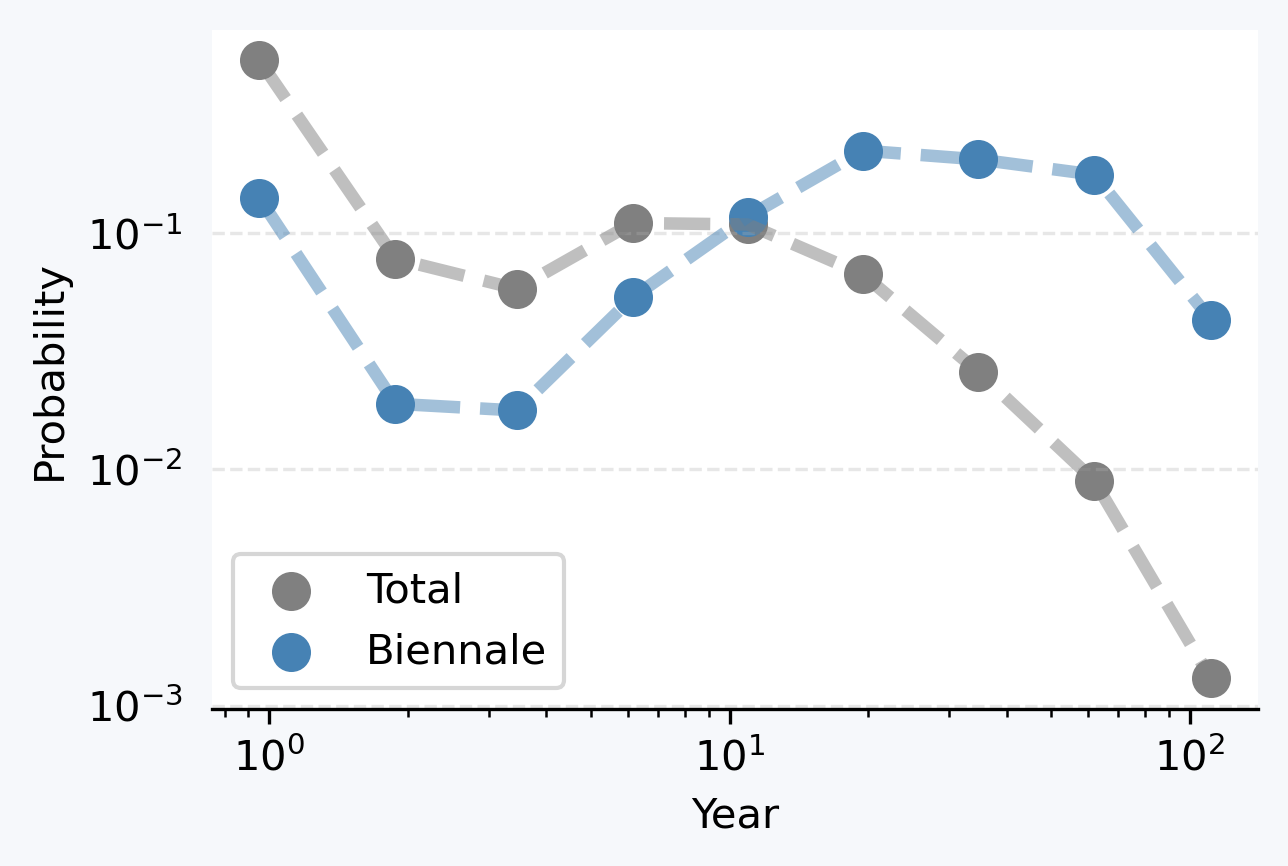

In [33]:

# Setting up the plot without bars, using markers and dashed lines instead
plt.figure(figsize=(4.5, 3), dpi=300)
plt.gcf().set_facecolor('lightsteelblue')
plt.gcf().patch.set_alpha(0.1)

# Plotting the probability density using a scatter plot for markers
plt.scatter(bin_centers, probability_density,color='grey',label='Total',s=70)
# Connecting the markers with a dashed line
plt.plot(bin_centers, probability_density, linestyle='dashed',color='grey',linewidth=3,alpha=0.5)


plt.scatter(bin_centers, probability_density2,color='steelblue',label='Biennale',s=70)
# Connecting the markers with a dashed line
plt.plot(bin_centers, probability_density2, linestyle='dashed',color='steelblue',linewidth=3,alpha=0.5)


plt.xscale('log')
plt.yscale('log')

#plt.title('Log-Scaled Probability Distribution of Career Length for All Artists')
plt.xlabel('Year')
plt.ylabel('Probability')
plt.legend()
plt.show()



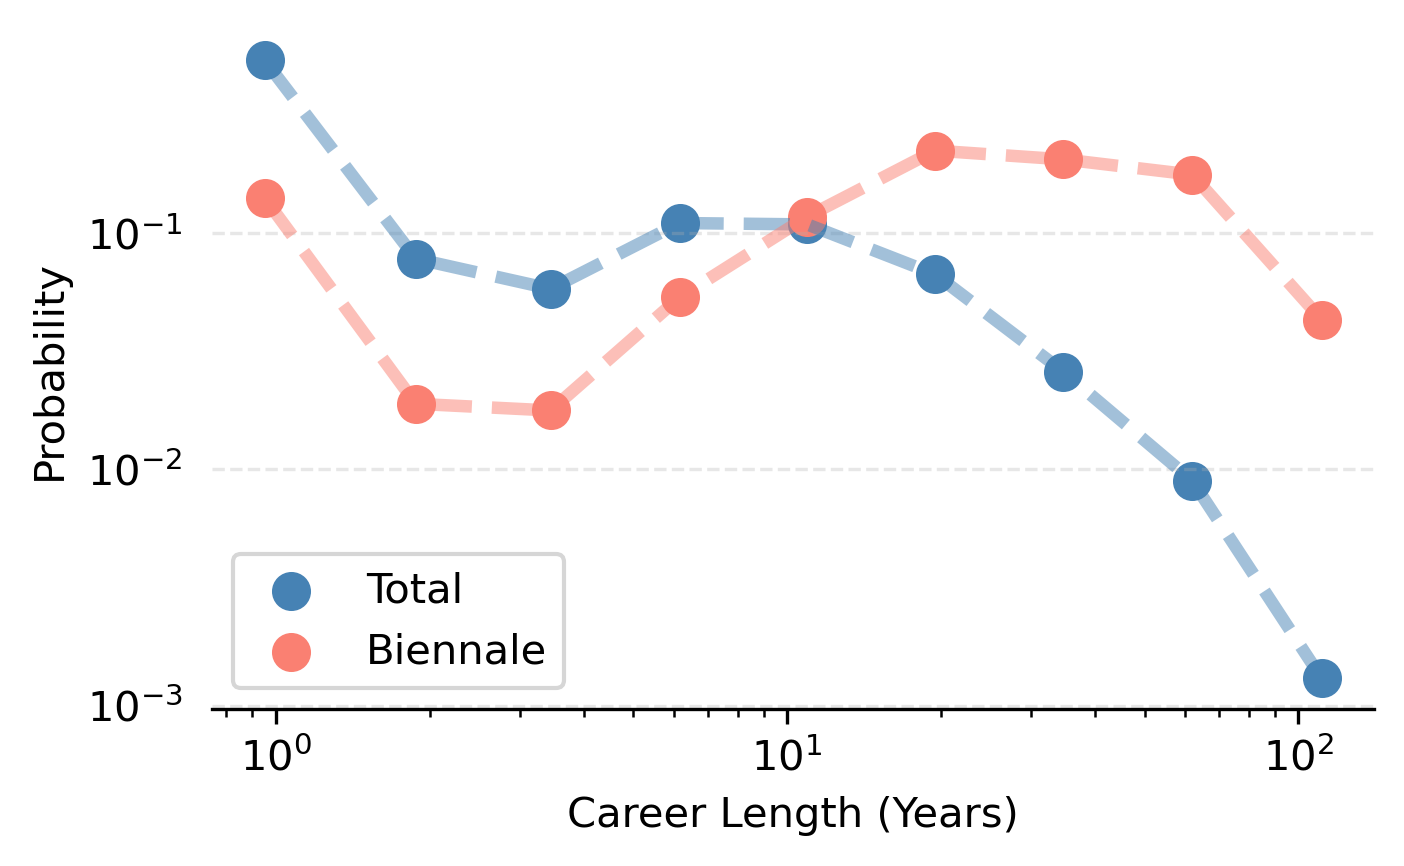

In [110]:

# Setting up the plot without bars, using markers and dashed lines instead
plt.figure(figsize=(5, 3), dpi=300)

# Plotting the probability density using a scatter plot for markers
plt.scatter(bin_centers, probability_density,color='steelblue',label='Total',s=70)
# Connecting the markers with a dashed line
plt.plot(bin_centers, probability_density, linestyle='dashed',color='steelblue',linewidth=3,alpha=0.5)


plt.scatter(bin_centers, probability_density2,color='salmon',label='Biennale',s=70)
# Connecting the markers with a dashed line
plt.plot(bin_centers, probability_density2, linestyle='dashed',color='salmon',linewidth=3,alpha=0.5)


plt.xscale('log')
plt.yscale('log')

#plt.title('Log-Scaled Probability Distribution of Career Length for All Artists')
plt.xlabel('Career Length (Years)')
plt.ylabel('Probability')
plt.legend()
plt.show()



In [11]:
all_exh.head()

,id,type,title,venue_name,venue_address,venue_links_profile,venue_links_card,venue_city,venue_country,venue_coordinates,city_id,city_name,city_links_profile,city_links_card,country_id,country_name,country_links_profile,country_links_card,institution_id,institution_name,institution_links_profile,institution_links_card,curators,links_profile,links_card,links_image,links_preview,links_thumb,begin_date,end_date,description,caption,events,artist_count,follower_count,exhibitors,end_year,artist_id,artist_name,artist_first_name,artist_last_name,artist_birth_year,artist_nationality,artist_ranking,artist_links.profile,artist_links.card,artist_links.www,artist_links.preview,artist_links.wikipedia,artist_links.instagram,artist_links.facebook,artist_links.twitter,artist_links.image
0,962424,S,Nikita Gale - Thank God You're Here,56 Henry,Henry Street 56,https://artfacts.net/institution/56-henry/37970,/institution/56-henry/37970,"New York City, NY",United States,"[-73.9951749, 40.712776250000005]",59.0,"New York City, NY",https://artfacts.net/city/new-york-city-ny/59,/city/new-york-city-ny/59,18.0,United States,https://artfacts.net/country/united-states/18,/country/united-states/18,37970.0,56 Henry,https://artfacts.net/institution/56-henry/37970,/institution/56-henry/37970,[],https://artfacts.net/exhibition/nikita-gale-th...,/exhibition/nikita-gale-thank-god-you-re-here/...,https://images.artfacts.net/exhibpics/962424.jpg,https://images.artfacts.net/exhibpics/preview/...,https://images.artfacts.net/exhibpics/thumbs/9...,2021-02-05,2021-03-25,NaN,NaN,[],1.0,0.0,[],2021,329449,Nikita Gale,Nikita,Gale,1983.0,United States,1,https://artfacts.net/artist/nikita-gale/329449,/artist/nikita-gale/329449,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,892779,F,Paris Internationale 2019,NaN,Rue Alfred de Vigny 16,https://artfacts.net/institution/paris-interna...,/institution/paris-internationale/34270,Paris,France,"[2.3051751, 48.8793634]",63.0,Paris,https://artfacts.net/city/paris/63,/city/paris/63,15.0,France,https://artfacts.net/country/france/15,/country/france/15,34270.0,Paris Internationale,https://artfacts.net/institution/paris-interna...,/institution/paris-internationale/34270,[],https://artfacts.net/exhibition/paris-internat...,/exhibition/paris-internationale-2019/892779,https://images.artfacts.net/exhibpics/892779.jpg,https://images.artfacts.net/exhibpics/preview/...,https://images.artfacts.net/exhibpics/thumbs/8...,2019-10-16,2019-10-20,The 5th edition of Paris Internationale takes ...,NaN,[],6.0,0.0,"[{'id': '26426', 'name': 'Carlos/Ishikawa', 'l...",2019,250379,Stijn Ank,Stijn,Ank,1977.0,[],1,https://artfacts.net/artist/stijn-ank/250379,/artist/stijn-ank/250379,https://www.stijnank.com,https://images.artfacts.net/artistpics/preview...,NaN,NaN,NaN,NaN,NaN
2,892779,F,Paris Internationale 2019,NaN,Rue Alfred de Vigny 16,https://artfacts.net/institution/paris-interna...,/institution/paris-internationale/34270,Paris,France,"[2.3051751, 48.8793634]",63.0,Paris,https://artfacts.net/city/paris/63,/city/paris/63,15.0,France,https://artfacts.net/country/france/15,/country/france/15,34270.0,Paris Internationale,https://artfacts.net/institution/paris-interna...,/institution/paris-internationale/34270,[],https://artfacts.net/exhibition/paris-internat...,/exhibition/paris-internationale-2019/892779,https://images.artfacts.net/exhibpics/892779.jpg,https://images.artfacts.net/exhibpics/preview/...,https://images.artfacts.net/exhibpics/thumbs/8...,2019-10-16,2019-10-20,The 5th edition of Paris Internationale takes ...,NaN,[],6.0,0.0,"[{'id': '26426', 'name': 'Carlos/Ishikawa', 'l...",2019,704233,Dominique White,Dominique,White,1993.0,United Kingdom,2,https://artfacts.net/artist/dominique-white/70...,/artist/dominique-white/704233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,892779,F,Paris Internationale 2019,NaN,Rue Alfred de Vigny 16,https://artfacts.net/institution/paris-interna...,/institution/paris-internationale/34270,Paris,France,"[2.3051751, 48.8793634]",63.0,Paris,https://artfacts

In [8]:
all_exh_gp=all_exh[['end_year', 'type','id']].groupby(['end_year', 'type']).nunique().reset_index()

In [14]:
all_exh_gp.tail()

,end_year,type,id
449,2028,S,2
450,2029,S,1
451,2030,G,2
452,2030,S,1
453,2031,S,2


In [15]:
all_exh_gp.to_csv('../data/arts_long_df_process/all_exh_gp.csv',header=True,index=False)

In [4]:
all_exh_gp.head()

,end_year,type,count
0,1829,G,30
1,1860,S,1
2,1863,G,30
3,1867,S,1
4,1874,G,30


In [114]:
result.head()

,id,type,title,venue_name,venue_address,venue_links_profile,venue_links_card,venue_city,venue_country,venue_coordinates,city_id,city_name,city_links_profile,city_links_card,country_id,country_name,country_links_profile,country_links_card,institution_id,institution_name,institution_links_profile,institution_links_card,curators,links_profile,links_card,links_image,links_preview,links_thumb,begin_date,end_date,description,caption,events,artist_count,follower_count,exhibitors,end_year,artist_id,artist_name,artist_first_name,artist_last_name,artist_birth_year,artist_nationality,artist_ranking,artist_links.profile,artist_links.card,artist_links.www,artist_links.preview,artist_links.wikipedia,artist_links.instagram,artist_links.facebook,artist_links.twitter,artist_links.image
0,962424,S,Nikita Gale - Thank God You're Here,56 Henry,Henry Street 56,https://artfacts.net/institution/56-henry/37970,/institution/56-henry/37970,"New York City, NY",United States,"[-73.9951749, 40.712776250000005]",59.0,"New York City, NY",https://artfacts.net/city/new-york-city-ny/59,/city/new-york-city-ny/59,18.0,United States,https://artfacts.net/country/united-states/18,/country/united-states/18,37970.0,56 Henry,https://artfacts.net/institution/56-henry/37970,/institution/56-henry/37970,[],https://artfacts.net/exhibition/nikita-gale-th...,/exhibition/nikita-gale-thank-god-you-re-here/...,https://images.artfacts.net/exhibpics/962424.jpg,https://images.artfacts.net/exhibpics/preview/...,https://images.artfacts.net/exhibpics/thumbs/9...,2021-02-05,2021-03-25,NaN,NaN,[],1.0,0.0,[],2021,329449,Nikita Gale,Nikita,Gale,1983.0,United States,1,https://artfacts.net/artist/nikita-gale/329449,/artist/nikita-gale/329449,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,892779,F,Paris Internationale 2019,NaN,Rue Alfred de Vigny 16,https://artfacts.net/institution/paris-interna...,/institution/paris-internationale/34270,Paris,France,"[2.3051751, 48.8793634]",63.0,Paris,https://artfacts.net/city/paris/63,/city/paris/63,15.0,France,https://artfacts.net/country/france/15,/country/france/15,34270.0,Paris Internationale,https://artfacts.net/institution/paris-interna...,/institution/paris-internationale/34270,[],https://artfacts.net/exhibition/paris-internat...,/exhibition/paris-internationale-2019/892779,https://images.artfacts.net/exhibpics/892779.jpg,https://images.artfacts.net/exhibpics/preview/...,https://images.artfacts.net/exhibpics/thumbs/8...,2019-10-16,2019-10-20,The 5th edition of Paris Internationale takes ...,NaN,[],6.0,0.0,"[{'id': '26426', 'name': 'Carlos/Ishikawa', 'l...",2019,250379,Stijn Ank,Stijn,Ank,1977.0,[],1,https://artfacts.net/artist/stijn-ank/250379,/artist/stijn-ank/250379,https://www.stijnank.com,https://images.artfacts.net/artistpics/preview...,NaN,NaN,NaN,NaN,NaN
2,892779,F,Paris Internationale 2019,NaN,Rue Alfred de Vigny 16,https://artfacts.net/institution/paris-interna...,/institution/paris-internationale/34270,Paris,France,"[2.3051751, 48.8793634]",63.0,Paris,https://artfacts.net/city/paris/63,/city/paris/63,15.0,France,https://artfacts.net/country/france/15,/country/france/15,34270.0,Paris Internationale,https://artfacts.net/institution/paris-interna...,/institution/paris-internationale/34270,[],https://artfacts.net/exhibition/paris-internat...,/exhibition/paris-internationale-2019/892779,https://images.artfacts.net/exhibpics/892779.jpg,https://images.artfacts.net/exhibpics/preview/...,https://images.artfacts.net/exhibpics/thumbs/8...,2019-10-16,2019-10-20,The 5th edition of Paris Internationale takes ...,NaN,[],6.0,0.0,"[{'id': '26426', 'name': 'Carlos/Ishikawa', 'l...",2019,704233,Dominique White,Dominique,White,1993.0,United Kingdom,2,https://artfacts.net/artist/dominique-white/70...,/artist/dominique-white/704233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,892779,F,Paris Internationale 2019,NaN,Rue Alfred de Vigny 16,https://artfacts.net/institution/paris-interna...,/institution/paris-internationale/34270,Paris,France,"[2.3051751, 48.8793634]",63.0,Paris,https://artfacts

In [12]:
type_counts = result.groupby(['artist_name','artist_id', 'end_year', 'type']).size().reset_index(name='count')

In [121]:
type_counts.head()

,artist_name,artist_id,end_year,type,count
0,!Mediengruppe Bitnik,181392,2005,S,1
1,!Mediengruppe Bitnik,181392,2008,B,1
2,!Mediengruppe Bitnik,181392,2008,G,2
3,!Mediengruppe Bitnik,181392,2008,S,1
4,!Mediengruppe Bitnik,181392,2009,G,2


In [117]:
type_counts.to_csv('../data/arts_long_df_process/artfacts_all_type_counts.csv',header=True,index=False)

# Calculate Biennale participants' by cohorts

In [18]:
biennale_pp['artist_id']=biennale_pp['artist_id'].astype(int)
type_counts['artist_id']=type_counts['artist_id'].astype(int)

In [19]:
biennale_history=pd.merge(type_counts, biennale_pp1,how='inner',on='artist_id')
biennale_history=pd.merge(type_counts, biennale_pp,how='inner',on='artist_id')

In [137]:
biennale_history.head()

,artist_name,artist_id,end_year,type,count,year,c
0,A-1 53167,22887,2001,G,1,2001,1
1,A-1 53167,22887,2003,G,1,2001,1
2,A-1 53167,22887,2004,G,3,2001,1
3,A-1 53167,22887,2005,S,1,2001,1
4,A-1 53167,22887,2006,B,1,2001,1


In [157]:
biennale_history.shape

(226295, 7)

In [20]:
filtered_biennale_history = biennale_history[(biennale_history['end_year'] >= biennale_history['year'] - 5) & (biennale_history['end_year'] <= biennale_history['year'] + 10)]

In [159]:
filtered_biennale_history.head()

,artist_name,artist_id,end_year,type,count,year,c
0,A-1 53167,22887,2001,G,1,2001,1
1,A-1 53167,22887,2003,G,1,2001,1
2,A-1 53167,22887,2004,G,3,2001,1
3,A-1 53167,22887,2005,S,1,2001,1
4,A-1 53167,22887,2006,B,1,2001,1


In [160]:
filtered_biennale_history.to_csv('filtered_biennale_history.csv',header=True,index=False)

In [161]:
filtered_biennale_history['year2biennale']=filtered_biennale_history['end_year']-filtered_biennale_history['year']

In [174]:
filtered_biennale_history.head()

,artist_name,artist_id,end_year,type,count,year,c,year2biennale,period,year2biennale_10
0,A-1 53167,22887,2001,G,1,2001,1,0,After,0
1,A-1 53167,22887,2003,G,1,2001,1,2,After,0
2,A-1 53167,22887,2004,G,3,2001,1,3,After,0
3,A-1 53167,22887,2005,S,1,2001,1,4,After,0
4,A-1 53167,22887,2006,B,1,2001,1,5,After,0


In [185]:
all_years_df.head()

,artist_name,level_1,end_year
0,A-1 53167,0,2001.0
1,A-1 53167,1,2002.0
2,A-1 53167,2,2003.0
3,A-1 53167,3,2004.0
4,A-1 53167,4,2005.0


In [103]:
import pandas as pd

# Determine the first and last year for each artist
artist_years = biennale_history.groupby(['artist_id'])['end_year'].agg(['min', 'max'])

# Create a DataFrame with all years for each artist
all_years_df = (artist_years.apply(lambda x: pd.Series(range(x['min'], x['max'] + 1)), axis=1)
                .stack()
                .reset_index(level=1, drop=True)
                .reset_index(name='end_year'))

# Pivot the original data to get types as columns
pivot_df = biennale_history.pivot_table(index=['artist_id', 'end_year'], 
                                                 columns='type', 
                                                 values='count', 
                                                 aggfunc='sum',
                                                 fill_value=0).reset_index()

# Merge with all_years_df
merged_df = pd.merge(all_years_df, pivot_df, on=['artist_id', 'end_year'], how='left').fillna(0)

# Calculate cumulative counts
for col in ['B', 'F', 'G', 'S']:
    if col in merged_df.columns:
        merged_df[col] = merged_df.groupby(['artist_id'])[col].cumsum()

# Final DataFrame with cumulative counts for each artist from their first year to last year
result_df = merged_df.sort_values(by=['artist_id', 'end_year'])


In [104]:
# Calculate the minimum year for each artist
min_year_per_artist = result_df.groupby('artist_id')['end_year'].min().rename('min_year')

# Merge this information back into the original DataFrame
result_df = result_df.merge(min_year_per_artist, on='artist_id')

# Calculate 'career_age'
result_df['career_age'] = result_df['end_year'] - result_df['min_year']

# Display the DataFrame
result_df.head()

,artist_id,end_year,B,F,G,S,min_year,career_age
0,19,1983.0,0.0,0.0,1.0,0.0,1983.0,0.0
1,19,1984.0,0.0,0.0,1.0,0.0,1983.0,1.0
2,19,1985.0,0.0,0.0,1.0,0.0,1983.0,2.0
3,19,1986.0,0.0,0.0,1.0,0.0,1983.0,3.0
4,19,1987.0,0.0,0.0,1.0,0.0,1983.0,4.0


In [51]:
result_df.to_csv('../data/arts_long_df_process/treat_exh_counts.csv',header=True,index=False)

In [45]:
result_df=pd.read_csv('../data/arts_long_df_process/treat_exh_counts.csv')

# Control Group

In [106]:
control=type_counts[~(type_counts.artist_id.isin(biennale_artist.artist_id))]

In [165]:
control.to_csv('../data/arts_long_df_process/control_all_counts.csv',header=True,index=False)

In [164]:
control.shape

(2115610, 5)

In [108]:
import pandas as pd

# Determine the first and last year for each artist
artist_years = control.groupby(['artist_id'])['end_year'].agg(['min', 'max'])

# Create a DataFrame with all years for each artist
all_years_df = (artist_years.apply(lambda x: pd.Series(range(x['min'], x['max'] + 1)), axis=1)
                .stack()
                .reset_index(level=1, drop=True)
                .reset_index(name='end_year'))

# Pivot the original data to get types as columns
pivot_df = control.pivot_table(index=['artist_id', 'end_year'], 
                                                 columns='type', 
                                                 values='count', 
                                                 aggfunc='sum',
                                                 fill_value=0).reset_index()

# Merge with all_years_df
merged_df = pd.merge(all_years_df, pivot_df, on=['artist_id', 'end_year'], how='left').fillna(0)

# Calculate cumulative counts
for col in ['B', 'F', 'G', 'S']:
    if col in merged_df.columns:
        merged_df[col] = merged_df.groupby(['artist_id'])[col].cumsum()

# Final DataFrame with cumulative counts for each artist from their first year to last year
result_df2 = merged_df.sort_values(by=['artist_id', 'end_year'])


In [109]:
# Calculate the minimum year for each artist
min_year_per_artist2 = result_df2.groupby('artist_id')['end_year'].min().rename('min_year')

# Merge this information back into the original DataFrame
result_df2 = result_df2.merge(min_year_per_artist2, on='artist_id')

# Calculate 'career_age'
result_df2['career_age'] = result_df2['end_year'] - result_df2['min_year']

# Display the DataFrame
result_df2.head()

,artist_id,end_year,B,F,G,S,min_year,career_age
0,2,1999.0,0.0,0.0,0.0,1.0,1999.0,0.0
1,2,2000.0,0.0,0.0,0.0,2.0,1999.0,1.0
2,2,2001.0,0.0,0.0,0.0,2.0,1999.0,2.0
3,2,2002.0,0.0,0.0,1.0,2.0,1999.0,3.0
4,2,2003.0,0.0,0.0,1.0,2.0,1999.0,4.0


In [ ]:
result_df2.to_csv('../data/arts_long_df_process/control_exh_counts.csv',header=True,index=False)

In [14]:
result_df2=pd.read_csv('../data/arts_long_df_process/control_exh_counts.csv')

In [48]:
result_df.head()

,artist_id,end_year,B,F,G,S,min_year,career_age,artist_name_x,artist_birth_year_x,artist_name_y,artist_birth_year_y
0,19,1983.0,0.0,0.0,1.0,0.0,1983.0,0.0,Yoshimi Hashimoto,1949.0,Yoshimi Hashimoto,1949.0
1,19,1984.0,0.0,0.0,1.0,0.0,1983.0,1.0,Yoshimi Hashimoto,1949.0,Yoshimi Hashimoto,1949.0
2,19,1985.0,0.0,0.0,1.0,0.0,1983.0,2.0,Yoshimi Hashimoto,1949.0,Yoshimi Hashimoto,1949.0
3,19,1986.0,0.0,0.0,1.0,0.0,1983.0,3.0,Yoshimi Hashimoto,1949.0,Yoshimi Hashimoto,1949.0
4,19,1987.0,0.0,0.0,1.0,0.0,1983.0,4.0,Yoshimi Hashimoto,1949.0,Yoshimi Hashimoto,1949.0


In [16]:
result_df2.head(20)

,artist_id,end_year,B,F,G,S
0,2,1999.0,0.0,0.0,0.0,1.0
1,2,2000.0,0.0,0.0,0.0,2.0
2,2,2001.0,0.0,0.0,0.0,2.0
3,2,2002.0,0.0,0.0,1.0,2.0
4,2,2003.0,0.0,0.0,1.0,2.0
5,2,2004.0,0.0,0.0,1.0,2.0
6,2,2005.0,0.0,0.0,1.0,3.0
7,2,2006.0,0.0,0.0,1.0,3.0
8,2,2007.0,0.0,0.0,1.0,3.0
9,2,2008.0,0.0,0.0,1.0,3.0


# Find a match for Panel Data

## Add in age, nationality, gender (dictionary)

In [102]:
result['artist_id']=result['artist_id'].astype(int)
artists=result[['artist_name','artist_id','artist_birth_year','Europe','North America', 'South America', 'Asia', 'Oceania', 'Africa']].drop_duplicates()

In [94]:
# Normalize to ensure each entry is a list
normalized_nationalities = result['artist_nationality'].apply(lambda x: x if isinstance(x, list) else [x])

# Flatten the list of lists and remove None or empty entries
flat_list = [item for sublist in normalized_nationalities for item in sublist if item and item != 'None']

# Get unique nationalities
unique_nationalities = list(set(flat_list))

In [ ]:
def normalize_nationality(nat):
    if isinstance(nat, list):
        return nat
    if pd.isna(nat) or nat == 'None' or nat == '[]':
        return []
    return [nat]

def nationality_to_continent(nat_list):
    # Map of countries to continents
    country_continent = {
        'Sierra Leone': 'Africa',
        'Burkina Faso': 'Africa',
        'Saudi Arabia': 'Asia',
        'Bolivia': 'South America',
        'Greenland': 'North America',
        'Kiribati': 'Oceania',
        'Ukraine': 'Europe',
        'Kenya': 'Africa',
        'Thailand': 'Asia',
        'Uzbekistan': 'Asia',
        'Bhutan': 'Asia',
        'Kosovo': 'Europe',
        'Mongolia': 'Asia',
        'Puerto Rico': 'North America',
        'Latvia': 'Europe',
        'Togo': 'Africa',
        'Jordan': 'Asia',
        'Germany': 'Europe',
        'Barbados': 'North America',
        'Canada': 'North America',
        'Colombia': 'South America',
        'Zambia': 'Africa',
        'Belarus': 'Europe',
        'Slovenia': 'Europe',
        'Italy': 'Europe',
        'Venezuela': 'South America',
        'Brunei': 'Asia',
        'Albania': 'Europe',
        'Montenegro': 'Europe',
        'Botswana': 'Africa',
        'Azerbaijan': 'Asia',
        'Ireland (Republic)': 'Europe',
        'Pakistan': 'Asia',
        'Luxembourg': 'Europe',
        'Liberia': 'Africa',
        'Cayman Islands': 'North America',
        'China': 'Asia',
        'Denmark': 'Europe',
        'Central African Republic': 'Africa',
        'Paraguay': 'South America',
        'Namibia': 'Africa',
        'Liechtenstein': 'Europe',
        'Portugal': 'Europe',
        'Dominica': 'North America',
        'South Korea': 'Asia',
        'Malawi': 'Africa',
        'Guinea-Bissau': 'Africa',
        'South Africa': 'Africa',
        'Afghanistan': 'Asia',
        'Ethiopia': 'Africa',
        'Algeria': 'Africa',
        'Nigeria': 'Africa',
        'Myanmar': 'Asia',
        'Equatorial Guinea': 'Africa',
        'Tajikistan': 'Asia',
        'Kazakhstan': 'Asia',
        'Brazil': 'South America',
        'Uruguay': 'South America',
        'Morocco': 'Africa',
        'Swaziland': 'Africa',
        'Eritrea': 'Africa',
        'Croatia': 'Europe',
        'Romania': 'Europe',
        'Tonga': 'Oceania',
        'Cameroon': 'Africa',
        'North Macedonia': 'Europe',
        'Gambia': 'Africa',
        'Iran': 'Asia',
        'Mozambique': 'Africa',
        'Curaçao': 'North America',
        'Bahamas': 'North America',
        'USA': 'North America',
        'Bahrain': 'Asia',
        'Dominican Republic': 'North America',
        'Palestinian territories': 'Asia',
        'São Tomé e Príncipe': 'Africa',
        'Kurdistan': 'Asia',  # Note: Kurdistan is not a recognized country but a region
        'United Arab Emirates': 'Asia',
        'Madagascar': 'Africa',
        'Malaysia': 'Asia',
        'Czech Republic': 'Europe',
        'Sudan': 'Africa',
        'Slovakia': 'Europe',
        'Cyprus': 'Europe',
        'Moldova': 'Europe',
        'Bulgaria': 'Europe',
        'Lebanon': 'Asia',
        'Oman': 'Asia',
        'Grenada': 'North America',
        'Kuwait': 'Asia',
        'Mauritania': 'Africa',
        'Lithuania': 'Europe',
        'San Marino': 'Europe',
        'Micronesia': 'Oceania',
        'Rwanda': 'Africa',
        'Spain': 'Europe',
        'Guatemala': 'North America',
        'Taiwan': 'Asia',
        'Trinidad & Tobago': 'North America',
        'Sri Lanka': 'Asia',
        'El Salvador': 'North America',
        'Benin': 'Africa',
        'Hungary': 'Europe',
        'Indonesia': 'Asia',
        'United States Virgin Islands': 'North America',
        'Malta': 'Europe',
        'Bermuda': 'North America',
        'India': 'Asia',
        'Australia': 'Oceania',
        'Russia': 'Europe',
        'Austria': 'Europe',
        'Libya': 'Africa',
        'Seychelles': 'Africa',
        'Vanuatu': 'Oceania',
        'Bosnia and Herzegovina': 'Europe',
        'Angola': 'Africa',
        'Laos': 'Asia',
        'Cape Verde': 'Africa',
        'Nicaragua': 'North America',
        'Burundi': 'Africa',
        'New Zealand': 'Oceania',
        'Finland': 'Europe',
        'Cuba': 'North America',
        'Iraq': 'Asia',
        'Jamaica': 'North America',
        'Zimbabwe': 'Africa',
        'Georgia': 'Asia',  # Note: Geographically part of both Europe and Asia
        'Faeroe Islands': 'Europe',
        'Egypt': 'Africa',
        'Mali': 'Africa',
        'Netherlands': 'Europe',
        'Vatican City State': 'Europe',
        'Netherlands Antilles': 'North America',  # Dissolved in 2010
        'Philippines': 'Asia',
        'Peru': 'South America',
        'Chile': 'South America',
        'Nepal': 'Asia',
        'Ivory Coast': 'Africa',
        'Chad': 'Africa',
        'Belgium': 'Europe',
        'Vietnam': 'Asia',
        'Greece': 'Europe',
        'Monaco': 'Europe',
        'France': 'Europe',
        'Haiti': 'North America',
        'Ecuador': 'South America',
        'Senegal': 'Africa',
        'Bangladesh': 'Asia',
        'Israel': 'Asia',
        'Tanzania': 'Africa',
        'Papua New Guinea': 'Oceania',
        'Mexico': 'North America',
        'Niger': 'Africa',
        'Hong Kong': 'Asia',
        'Uganda': 'Africa',
        'Iceland': 'Europe',
        'Serbia': 'Europe',
        'Aruba': 'North America',
        'Suriname': 'South America',
        'Estonia': 'Europe',
        'United Kingdom': 'Europe',
        'Honduras': 'North America',
        'Samoa': 'Oceania',
        'Qatar': 'Asia',
        'Saint Barthélemy': 'North America',
        'Gabon': 'Africa',
        'Argentina': 'South America',
        'Andorra': 'Europe',
        'Singapore': 'Asia',
        'Reunion': 'Africa',
        'East Timor': 'Asia',
        'Belize': 'North America',
        'Costa Rica': 'North America',
        'Ghana': 'Africa',
        'Tunisia': 'Africa',
        'Guyana': 'South America',
        'Japan': 'Asia',
        'Cambodia': 'Asia',
        'Saint Vincent and the Grenadines': 'North America',
        'Kyrgyzstan': 'Asia',
        'Syria': 'Asia',
        'Turkey': 'Europe/Asia',  # Straddles both continents
        'Democratic Republic of the Congo': 'Africa',
        'Poland': 'Europe',
        'Armenia': 'Europe/Asia',  # Geographically and culturally part of both
        'Switzerland': 'Europe',
        'North Korea': 'Asia',
        'Norway': 'Europe',
        'Panama': 'North America',
        'Guadeloupe': 'North America',
        'Sweden': 'Europe',
        'United States': 'North America',
        'Mauritius': 'Africa',
        'Fiji Islands': 'Oceania'
    }

    continents = {'Europe': 0, 'North America': 0, 'South America': 0, 'Asia': 0, 'Oceania': 0, 'Africa': 0}
    for nat in nat_list:
        continent = country_continent.get(nat)
        if continent:
            continents[continent] = 1
    return pd.Series(continents)

# Normalize the artist_nationality column
result['artist_nationality'] = result['artist_nationality'].apply(normalize_nationality)

# Create new continent columns
continent_columns = result['artist_nationality'].apply(nationality_to_continent)
result = pd.concat([result, continent_columns], axis=1)


In [110]:
result_df2=pd.merge(result_df2,artists,how='inner',on='artist_id')
result_df2['age']=result_df2['end_year']-result_df2['artist_birth_year']
result_df2.to_csv('../data/arts_long_df_process/control_exh_counts.csv',header=True,index=False)

In [44]:
result_df.head()

,artist_id,end_year,B,F,G,S,min_year,career_age,artist_name_x,artist_birth_year_x,artist_name_y,artist_birth_year_y
0,19,1983.0,0.0,0.0,1.0,0.0,1983.0,0.0,Yoshimi Hashimoto,1949.0,Yoshimi Hashimoto,1949.0
1,19,1984.0,0.0,0.0,1.0,0.0,1983.0,1.0,Yoshimi Hashimoto,1949.0,Yoshimi Hashimoto,1949.0
2,19,1985.0,0.0,0.0,1.0,0.0,1983.0,2.0,Yoshimi Hashimoto,1949.0,Yoshimi Hashimoto,1949.0
3,19,1986.0,0.0,0.0,1.0,0.0,1983.0,3.0,Yoshimi Hashimoto,1949.0,Yoshimi Hashimoto,1949.0
4,19,1987.0,0.0,0.0,1.0,0.0,1983.0,4.0,Yoshimi Hashimoto,1949.0,Yoshimi Hashimoto,1949.0


In [111]:
result_df=pd.merge(result_df,artists,how='inner',on='artist_id')
result_df['age']=result_df['end_year']-result_df['artist_birth_year']
result_df.to_csv('../data/arts_long_df_process/treat_exh_counts.csv',header=True,index=False)

In [53]:
result_df.head()

,artist_id,end_year,B,F,G,S,min_year,career_age,artist_name,artist_birth_year,age
0,19,1983.0,0.0,0.0,1.0,0.0,1983.0,0.0,Yoshimi Hashimoto,1949.0,34.0
1,19,1984.0,0.0,0.0,1.0,0.0,1983.0,1.0,Yoshimi Hashimoto,1949.0,35.0
2,19,1985.0,0.0,0.0,1.0,0.0,1983.0,2.0,Yoshimi Hashimoto,1949.0,36.0
3,19,1986.0,0.0,0.0,1.0,0.0,1983.0,3.0,Yoshimi Hashimoto,1949.0,37.0
4,19,1987.0,0.0,0.0,1.0,0.0,1983.0,4.0,Yoshimi Hashimoto,1949.0,38.0


In [112]:
import gender_guesser.detector as gender

# Initialize the gender detector
detector = gender.Detector(case_sensitive=False)

# Function to estimate gender based on first name
def estimate_gender(name):
    if pd.isna(name):
        return "Unknown"
    first_name = name.split()[0]
    return detector.get_gender(first_name)


In [113]:
# Apply the function to the 'artist_name' column
treated=result_df.copy()
treated['gender_est'] = treated['artist_name'].apply(estimate_gender)
treated.head()

,artist_id,end_year,B,F,G,S,min_year,career_age,artist_name,artist_birth_year,Europe,North America,South America,Asia,Oceania,Africa,age,gender_est
0,19,1983.0,0.0,0.0,1.0,0.0,1983.0,0.0,Yoshimi Hashimoto,1949.0,0.0,0.0,0.0,1.0,0.0,0.0,34.0,mostly_female
1,19,1984.0,0.0,0.0,1.0,0.0,1983.0,1.0,Yoshimi Hashimoto,1949.0,0.0,0.0,0.0,1.0,0.0,0.0,35.0,mostly_female
2,19,1985.0,0.0,0.0,1.0,0.0,1983.0,2.0,Yoshimi Hashimoto,1949.0,0.0,0.0,0.0,1.0,0.0,0.0,36.0,mostly_female
3,19,1986.0,0.0,0.0,1.0,0.0,1983.0,3.0,Yoshimi Hashimoto,1949.0,0.0,0.0,0.0,1.0,0.0,0.0,37.0,mostly_female
4,19,1987.0,0.0,0.0,1.0,0.0,1983.0,4.0,Yoshimi Hashimoto,1949.0,0.0,0.0,0.0,1.0,0.0,0.0,38.0,mostly_female


In [114]:
treated[treated.gender_est=='female'].head()

,artist_id,end_year,B,F,G,S,min_year,career_age,artist_name,artist_birth_year,Europe,North America,South America,Asia,Oceania,Africa,age,gender_est
998,73,1970.0,0.0,0.0,1.0,0.0,1970.0,0.0,Charlotte Moorman,1933.0,0.0,1.0,0.0,0.0,0.0,0.0,37.0,female
999,73,1971.0,0.0,0.0,2.0,0.0,1970.0,1.0,Charlotte Moorman,1933.0,0.0,1.0,0.0,0.0,0.0,0.0,38.0,female
1000,73,1972.0,0.0,0.0,2.0,0.0,1970.0,2.0,Charlotte Moorman,1933.0,0.0,1.0,0.0,0.0,0.0,0.0,39.0,female
1001,73,1973.0,0.0,0.0,2.0,0.0,1970.0,3.0,Charlotte Moorman,1933.0,0.0,1.0,0.0,0.0,0.0,0.0,40.0,female
1002,73,1974.0,0.0,0.0,2.0,0.0,1970.0,4.0,Charlotte Moorman,1933.0,0.0,1.0,0.0,0.0,0.0,0.0,41.0,female


In [116]:
treated.to_csv('../data/arts_long_df_process/treat_counts.csv',header=True,index=False)
control.to_csv('../data/arts_long_df_process/control_counts.csv',header=True,index=False)

In [115]:
control=result_df2.copy()
control['gender_est'] = control['artist_name'].apply(estimate_gender)
control.head()

,artist_id,end_year,B,F,G,S,min_year,career_age,artist_name,artist_birth_year,Europe,North America,South America,Asia,Oceania,Africa,age,gender_est
0,2,1999.0,0.0,0.0,0.0,1.0,1999.0,0.0,Carlos Gallardo,1944.0,0.0,0.0,1.0,0.0,0.0,0.0,55.0,male
1,2,2000.0,0.0,0.0,0.0,2.0,1999.0,1.0,Carlos Gallardo,1944.0,0.0,0.0,1.0,0.0,0.0,0.0,56.0,male
2,2,2001.0,0.0,0.0,0.0,2.0,1999.0,2.0,Carlos Gallardo,1944.0,0.0,0.0,1.0,0.0,0.0,0.0,57.0,male
3,2,2002.0,0.0,0.0,1.0,2.0,1999.0,3.0,Carlos Gallardo,1944.0,0.0,0.0,1.0,0.0,0.0,0.0,58.0,male
4,2,2003.0,0.0,0.0,1.0,2.0,1999.0,4.0,Carlos Gallardo,1944.0,0.0,0.0,1.0,0.0,0.0,0.0,59.0,male


In [117]:
treated.value_counts('gender_est')

gender_est
male             282090
female            44687
unknown           39163
andy               4667
mostly_male        4528
mostly_female      2486
dtype: int64

In [118]:
control.value_counts('gender_est')

gender_est
male             2156165
female           1209560
unknown           438966
andy               96658
mostly_male        79344
mostly_female      65473
dtype: int64

In [122]:
use_biennale=biennale_gp[biennale_gp.c==1]
use_biennale=use_biennale[['artist_id','year']]
use_biennale.columns=['artist_id','biennale_year']

In [123]:
treated.shape

(377621, 18)

In [124]:
treated1=pd.merge(treated, use_biennale,how='inner',on='artist_id')
treated1.shape

(212155, 19)

In [125]:
treated1.head()

,artist_id,end_year,B,F,G,S,min_year,career_age,artist_name,artist_birth_year,Europe,North America,South America,Asia,Oceania,Africa,age,gender_est,biennale_year
0,19,1983.0,0.0,0.0,1.0,0.0,1983.0,0.0,Yoshimi Hashimoto,1949.0,0.0,0.0,0.0,1.0,0.0,0.0,34.0,mostly_female,2001
1,19,1984.0,0.0,0.0,1.0,0.0,1983.0,1.0,Yoshimi Hashimoto,1949.0,0.0,0.0,0.0,1.0,0.0,0.0,35.0,mostly_female,2001
2,19,1985.0,0.0,0.0,1.0,0.0,1983.0,2.0,Yoshimi Hashimoto,1949.0,0.0,0.0,0.0,1.0,0.0,0.0,36.0,mostly_female,2001
3,19,1986.0,0.0,0.0,1.0,0.0,1983.0,3.0,Yoshimi Hashimoto,1949.0,0.0,0.0,0.0,1.0,0.0,0.0,37.0,mostly_female,2001
4,19,1987.0,0.0,0.0,1.0,0.0,1983.0,4.0,Yoshimi Hashimoto,1949.0,0.0,0.0,0.0,1.0,0.0,0.0,38.0,mostly_female,2001


In [126]:
treated1['biennale_treated']=0
treated1.loc[treated1.biennale_year<=treated1.end_year,'biennale_treated']=1

In [127]:
treated1.head()

,artist_id,end_year,B,F,G,S,min_year,career_age,artist_name,artist_birth_year,Europe,North America,South America,Asia,Oceania,Africa,age,gender_est,biennale_year,biennale_treated
0,19,1983.0,0.0,0.0,1.0,0.0,1983.0,0.0,Yoshimi Hashimoto,1949.0,0.0,0.0,0.0,1.0,0.0,0.0,34.0,mostly_female,2001,0
1,19,1984.0,0.0,0.0,1.0,0.0,1983.0,1.0,Yoshimi Hashimoto,1949.0,0.0,0.0,0.0,1.0,0.0,0.0,35.0,mostly_female,2001,0
2,19,1985.0,0.0,0.0,1.0,0.0,1983.0,2.0,Yoshimi Hashimoto,1949.0,0.0,0.0,0.0,1.0,0.0,0.0,36.0,mostly_female,2001,0
3,19,1986.0,0.0,0.0,1.0,0.0,1983.0,3.0,Yoshimi Hashimoto,1949.0,0.0,0.0,0.0,1.0,0.0,0.0,37.0,mostly_female,2001,0
4,19,1987.0,0.0,0.0,1.0,0.0,1983.0,4.0,Yoshimi Hashimoto,1949.0,0.0,0.0,0.0,1.0,0.0,0.0,38.0,mostly_female,2001,0


In [128]:
control1=control.copy()
control1['biennale_treated']=0

In [129]:
control1.to_csv('../data/arts_long_df_process/control1_counts.csv',header=True,index=False)
treated1.to_csv('../data/arts_long_df_process/treated1_counts.csv',header=True,index=False)

In [304]:
def create_treated2_modified(df):
    # Calculate 'year_diff' for each row
    df['year_diff'] = df['end_year'] - df['biennale_year']

    # First requirement: Filter out artist_ids that do not have 'year_diff' both < -5 and > 15
    valid_artist_ids = df.groupby('artist_id').filter(
        lambda x: any(x['year_diff'] < -5) and any(x['year_diff'] > 15)
    )['artist_id'].unique()

    # Second requirement: Keep only rows with 'year_diff' in the range -5 to 15
    treated2 = df[df['artist_id'].isin(valid_artist_ids) & (df['year_diff'] >= -5) & (df['year_diff'] <= 15)]

    return treated2

# Applying the modified function to create treated2 DataFrame
treated2 = create_treated2_modified(treated1)
treated2.head()


,artist_id,end_year,B,F,G,S,min_year,career_age,artist_name,artist_birth_year,Europe,North America,South America,Asia,Oceania,Africa,age,gender_est,biennale_year,biennale_treated,year_diff
13,19,1996.0,0.0,0.0,1.0,1.0,1983.0,13.0,Yoshimi Hashimoto,1949.0,0.0,0.0,0.0,1.0,0.0,0.0,47.0,mostly_female,2001,0,-5.0
14,19,1997.0,0.0,0.0,1.0,1.0,1983.0,14.0,Yoshimi Hashimoto,1949.0,0.0,0.0,0.0,1.0,0.0,0.0,48.0,mostly_female,2001,0,-4.0
15,19,1998.0,0.0,0.0,2.0,1.0,1983.0,15.0,Yoshimi Hashimoto,1949.0,0.0,0.0,0.0,1.0,0.0,0.0,49.0,mostly_female,2001,0,-3.0
16,19,1999.0,0.0,0.0,2.0,1.0,1983.0,16.0,Yoshimi Hashimoto,1949.0,0.0,0.0,0.0,1.0,0.0,0.0,50.0,mostly_female,2001,0,-2.0
17,19,2000.0,0.0,0.0,3.0,1.0,1983.0,17.0,Yoshimi Hashimoto,1949.0,0.0,0.0,0.0,1.0,0.0,0.0,51.0,mostly_female,2001,0,-1.0


In [305]:
def categorize_career_stage_biennale(min_year, biennale_year):
    """Categorize the career stage based on career age at the Biennale year."""
    career_stage_year = biennale_year-min_year
    if career_stage_year < 10:
        return 'early'
    elif 10 <= career_stage_year < 30:
        return 'mid'
    else:
        return 'late'

def categorize_age_stage_biennale(artist_birth_year, biennale_year):
    """Categorize the age stage based on age at the Biennale year."""
    age_at_biennale = biennale_year - artist_birth_year
    if age_at_biennale < 20:
        return 'teen'
    elif 20 <= age_at_biennale <= 39:
        return 'adult'
    elif 40 <= age_at_biennale <= 59:
        return 'middle-age'
    elif 60 <= age_at_biennale <= 100:
        return 'senior'
    else:
        return 'posthumous'
def categorize_biennale_decade(biennale_year):
    """Categorize the Biennale year into decades."""
    decade = (biennale_year // 10) * 10
    return f"{int(decade)}s"



In [306]:
# Applying the categorization functions to the DataFrame
treated2['career_stage'] = treated2.apply(lambda x: categorize_career_stage_biennale(x['min_year'], x['biennale_year']), axis=1)
treated2['age_stage'] = treated2.apply(lambda x: categorize_age_stage_biennale(x['artist_birth_year'], x['biennale_year']), axis=1)
treated2['biennale_decade'] = treated2['biennale_year'].apply(categorize_biennale_decade)

treated2.head()

,artist_id,end_year,B,F,G,S,min_year,career_age,artist_name,artist_birth_year,Europe,North America,South America,Asia,Oceania,Africa,age,gender_est,biennale_year,biennale_treated,year_diff,career_stage,age_stage,biennale_decade
13,19,1996.0,0.0,0.0,1.0,1.0,1983.0,13.0,Yoshimi Hashimoto,1949.0,0.0,0.0,0.0,1.0,0.0,0.0,47.0,mostly_female,2001,0,-5.0,mid,middle-age,2000s
14,19,1997.0,0.0,0.0,1.0,1.0,1983.0,14.0,Yoshimi Hashimoto,1949.0,0.0,0.0,0.0,1.0,0.0,0.0,48.0,mostly_female,2001,0,-4.0,mid,middle-age,2000s
15,19,1998.0,0.0,0.0,2.0,1.0,1983.0,15.0,Yoshimi Hashimoto,1949.0,0.0,0.0,0.0,1.0,0.0,0.0,49.0,mostly_female,2001,0,-3.0,mid,middle-age,2000s
16,19,1999.0,0.0,0.0,2.0,1.0,1983.0,16.0,Yoshimi Hashimoto,1949.0,0.0,0.0,0.0,1.0,0.0,0.0,50.0,mostly_female,2001,0,-2.0,mid,middle-age,2000s
17,19,2000.0,0.0,0.0,3.0,1.0,1983.0,17.0,Yoshimi Hashimoto,1949.0,0.0,0.0,0.0,1.0,0.0,0.0,51.0,mostly_female,2001,0,-1.0,mid,middle-age,2000s


In [307]:
treated2.to_csv('../data/arts_long_df_process/treated2_counts.csv',header=True,index=False)

In [3]:
treated2=pd.read_csv('../data/arts_long_df_process/treated2_counts.csv')

<AxesSubplot:xlabel='year_diff', ylabel='S'>

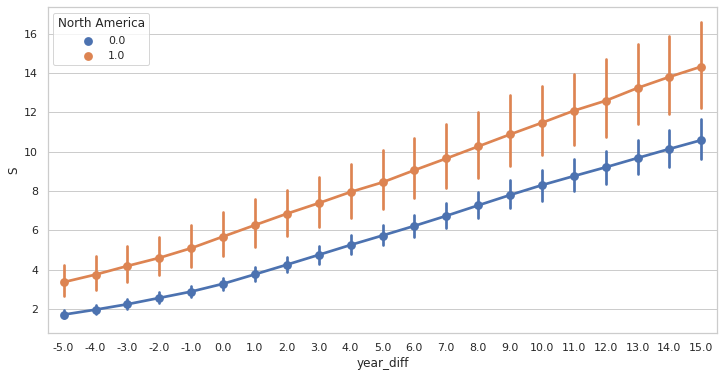

In [11]:
sns.set_theme(style="whitegrid")

# Create a point plot
plt.figure(figsize=(12, 6)) 
sns.pointplot(x='year_diff',y='S',data=treated2,hue='North America')

In [14]:
# import networkx as nx
from pyvis.network import Network
import pandas as pd

# Sample data for edgelist and nodelist
edgelist_data = {
    'Source': ['A', 'B', 'C', 'A', 'D', 'E'],
    'Target': ['B', 'C', 'D', 'D', 'A', 'B'],
    'Weight': [1, 2, 3, 4, 1, 2]
}

nodelist_data = {
    'Id': ['A', 'B', 'C', 'D', 'E'],
    'Label': ['Alpha', 'Bravo', 'Charlie', 'Delta', 'Echo'],
    'Country': ['USA', 'UK', 'France', 'Germany', 'Italy']
}

edgelist_df = pd.DataFrame(edgelist_data)
nodelist_df = pd.DataFrame(nodelist_data)

# Create a directed graph
G = nx.DiGraph()

# Add nodes with their attributes
for _, row in nodelist_df.iterrows():
    G.add_node(row['Id'], label=row['Label'], country=row['Country'])

# Add edges with weights
for _, row in edgelist_df.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'])

# Initialize PyVis network
net = Network('1000px', '1000px', directed=True, bgcolor='#ffffff')

# Add nodes and edges to the PyVis network
for node, node_attrs in G.nodes(data=True):
    net.add_node(node, label=node_attrs['label'], title=node_attrs['country'], 
                 color=node_attrs['country'], value=G.in_degree(node))

for source, target, edge_attrs in G.edges(data=True):
    net.add_edge(source, target, value=edge_attrs['weight'])

# Set the layout
net.repulsion(node_distance=420, central_gravity=0.33, spring_length=110, spring_strength=0.10)

# Generate network plot
net.show('network_graph.html')


network_graph.html


AttributeError: 'NoneType' object has no attribute 'render'

<AxesSubplot:xlabel='year_diff', ylabel='S'>

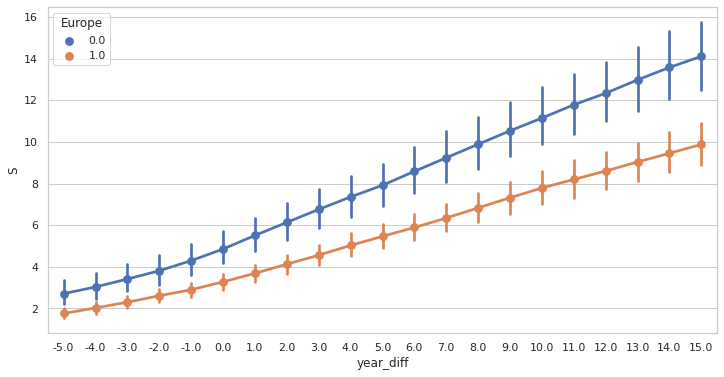

In [8]:
sns.set_theme(style="whitegrid")

# Create a point plot
plt.figure(figsize=(12, 6)) 
sns.pointplot(x='year_diff',y='S',data=treated2,hue='Europe')

<AxesSubplot:xlabel='year_diff', ylabel='S'>

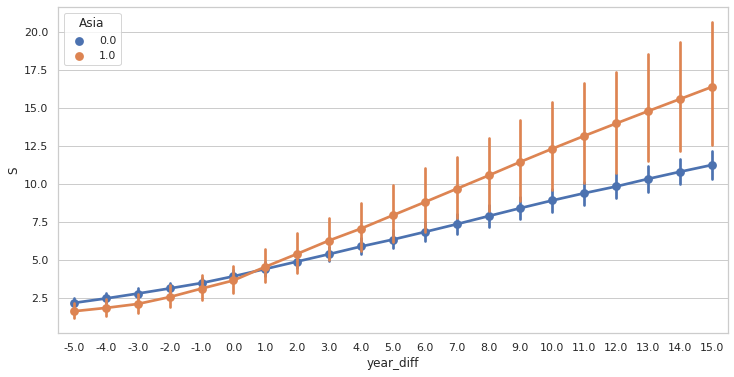

In [7]:
sns.set_theme(style="whitegrid")

# Create a point plot
plt.figure(figsize=(12, 6)) 
sns.pointplot(x='year_diff',y='S',data=treated2,hue='Asia')

<AxesSubplot:xlabel='year_diff', ylabel='G'>

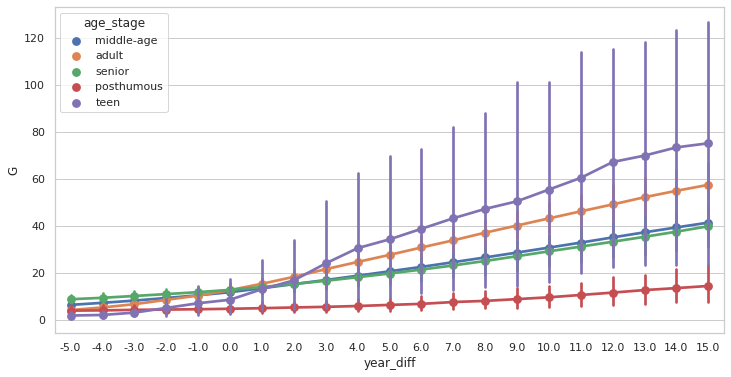

In [201]:
sns.set_theme(style="whitegrid")

# Create a point plot
plt.figure(figsize=(12, 6)) 
sns.pointplot(x='year_diff',y='G',data=treated2,hue='age_stage')

<AxesSubplot:xlabel='year_diff', ylabel='G'>

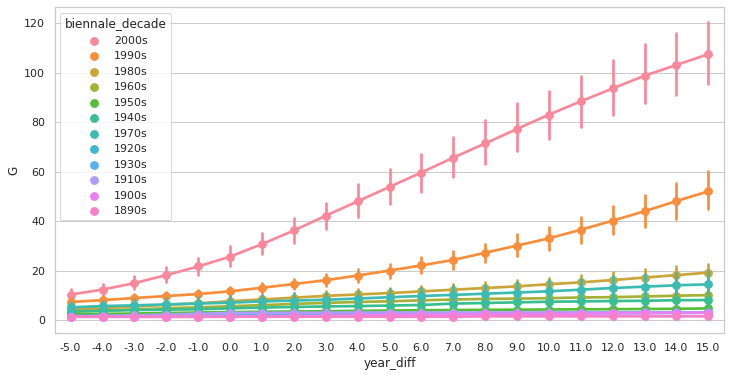

In [202]:
sns.set_theme(style="whitegrid")

# Create a point plot
plt.figure(figsize=(12, 6)) 
sns.pointplot(x='year_diff',y='G',data=treated2,hue='biennale_decade')

<AxesSubplot:xlabel='year_diff', ylabel='G'>

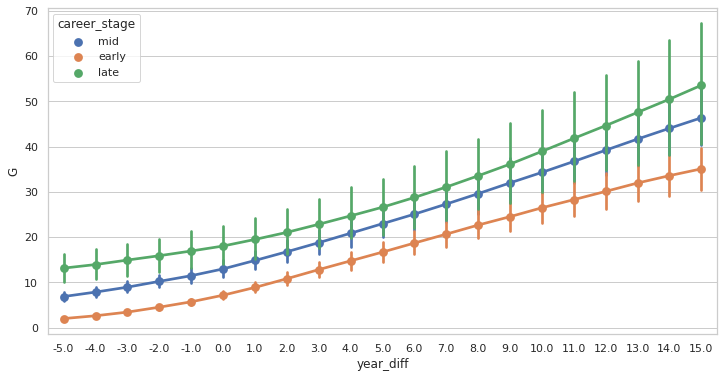

In [203]:
sns.set_theme(style="whitegrid")

# Create a point plot
plt.figure(figsize=(12, 6)) 
sns.pointplot(x='year_diff',y='G',data=treated2,hue='career_stage')

<AxesSubplot:xlabel='year_diff', ylabel='G'>

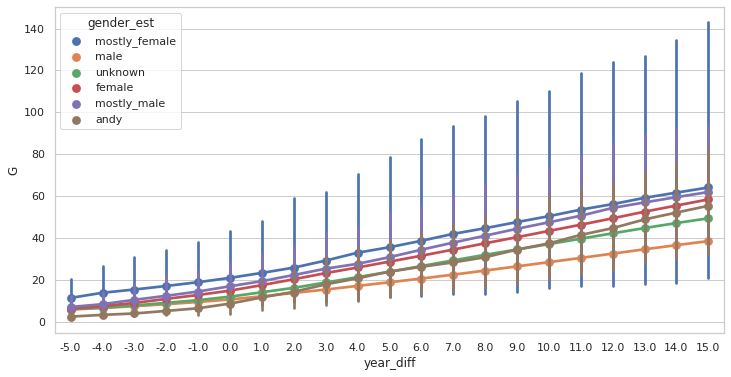

In [204]:
sns.set_theme(style="whitegrid")

# Create a point plot
plt.figure(figsize=(12, 6)) 
sns.pointplot(x='year_diff',y='G',data=treated2,hue='gender_est')

In [205]:
treated2.head(10)

,artist_id,end_year,B,F,G,S,min_year,career_age,artist_name,artist_birth_year,Europe,North America,South America,Asia,Oceania,Africa,age,gender_est,biennale_year,biennale_treated,year_diff,career_stage,age_stage,biennale_decade
13,19,1996.0,0.0,0.0,1.0,1.0,1983.0,13.0,Yoshimi Hashimoto,1949.0,0.0,0.0,0.0,1.0,0.0,0.0,47.0,mostly_female,2001,0,-5.0,mid,middle-age,2000s
14,19,1997.0,0.0,0.0,1.0,1.0,1983.0,14.0,Yoshimi Hashimoto,1949.0,0.0,0.0,0.0,1.0,0.0,0.0,48.0,mostly_female,2001,0,-4.0,mid,middle-age,2000s
15,19,1998.0,0.0,0.0,2.0,1.0,1983.0,15.0,Yoshimi Hashimoto,1949.0,0.0,0.0,0.0,1.0,0.0,0.0,49.0,mostly_female,2001,0,-3.0,mid,middle-age,2000s
16,19,1999.0,0.0,0.0,2.0,1.0,1983.0,16.0,Yoshimi Hashimoto,1949.0,0.0,0.0,0.0,1.0,0.0,0.0,50.0,mostly_female,2001,0,-2.0,mid,middle-age,2000s
17,19,2000.0,0.0,0.0,3.0,1.0,1983.0,17.0,Yoshimi Hashimoto,1949.0,0.0,0.0,0.0,1.0,0.0,0.0,51.0,mostly_female,2001,0,-1.0,mid,middle-age,2000s


In [206]:
control1.head()

,artist_id,end_year,B,F,G,S,min_year,career_age,artist_name,artist_birth_year,Europe,North America,South America,Asia,Oceania,Africa,age,gender_est,biennale_treated
0,2,1999.0,0.0,0.0,0.0,1.0,1999.0,0.0,Carlos Gallardo,1944.0,0.0,0.0,1.0,0.0,0.0,0.0,55.0,male,0
1,2,2000.0,0.0,0.0,0.0,2.0,1999.0,1.0,Carlos Gallardo,1944.0,0.0,0.0,1.0,0.0,0.0,0.0,56.0,male,0
2,2,2001.0,0.0,0.0,0.0,2.0,1999.0,2.0,Carlos Gallardo,1944.0,0.0,0.0,1.0,0.0,0.0,0.0,57.0,male,0
3,2,2002.0,0.0,0.0,1.0,2.0,1999.0,3.0,Carlos Gallardo,1944.0,0.0,0.0,1.0,0.0,0.0,0.0,58.0,male,0
4,2,2003.0,0.0,0.0,1.0,2.0,1999.0,4.0,Carlos Gallardo,1944.0,0.0,0.0,1.0,0.0,0.0,0.0,59.0,male,0


# Matching

In [267]:
def calculate_distance(series1, series2):
    distance, _ = fastdtw(series1, series2, dist=euclidean)
    return distance

In [308]:
treated2=pd.read_csv('../data/arts_long_df_process/treated2_counts.csv')

In [309]:
treated3 = treated2.copy()
treated3.loc[(treated3['biennale_treated'] > 0)&(treated3['B'] > 0), 'B'] = treated3.loc[
    (treated3['biennale_treated'] > 0)&(treated3['B'] > 0), 'B'] - 1

In [312]:
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

def calculate_distance(series1, series2):
    distance, _ = fastdtw(series1, series2, dist=euclidean)
    return distance

# Step 1: Filter the treated group for the five-year period
treated_group = treated3[(treated3['biennale_treated'] == 0) & (treated3['year_diff'] >= -5)]

# Step 2: Matching process considering cumulative distance
def find_matches(treated_group, control_df, num_matches=3):
    matched_control = pd.DataFrame()

    for artist_id, group in treated_group.groupby('artist_id'):
        # Initialize a dictionary to store distances
        artist_distances = {}

        # Filter potential matches based on static characteristics
        potential_matches = control_df[
            (control_df['gender_est'] == group.iloc[0]['gender_est']) &
            (abs(control_df['artist_birth_year'] - group.iloc[0]['artist_birth_year']) <= 5) &
            (control_df['Europe'] == group.iloc[0]['Europe']) &
            (control_df['North America'] == group.iloc[0]['North America']) &
            (control_df['South America'] == group.iloc[0]['South America']) &
            (control_df['Asia'] == group.iloc[0]['Asia']) &
            (control_df['Oceania'] == group.iloc[0]['Oceania']) &
            (control_df['Africa'] == group.iloc[0]['Africa'])
        ]
        potential_matches['biennale_year'] = group.iloc[0]['biennale_year']
        potential_matches = create_treated2_modified(potential_matches)
        control_dis = potential_matches[potential_matches['year_diff'] < 0]

        for artist_id_potential, group_potential in control_dis.groupby('artist_id'):
            distance_B = calculate_distance(group['B'], group_potential['B'])
            distance_G = calculate_distance(group['G'], group_potential['G'])
            distance_S = calculate_distance(group['S'], group_potential['S'])
            distance_F = calculate_distance(group['F'], group_potential['F'])
            distance = distance_B + distance_G + distance_S + distance_F

            # Store the distance for the potential match
            artist_distances[artist_id_potential] = distance

        # Select the top 3 closest matches
        closest_matches_ids = sorted(artist_distances, key=artist_distances.get)[:num_matches]
        closest_matches = potential_matches[potential_matches['artist_id'].isin(closest_matches_ids)]

        matched_control = pd.concat([matched_control, closest_matches])

    return matched_control.reset_index(drop=True)

# Find matches for each treated individual
matched_control = find_matches(treated_group, control1)


In [313]:
# Applying the categorization functions to the DataFrame
matched_control['career_stage'] = matched_control.apply(lambda x: categorize_career_stage_biennale(x['min_year'], x['biennale_year']), axis=1)
matched_control['biennale_decade'] = matched_control['biennale_year'].apply(categorize_biennale_decade)
matched_control['age_stage'] = matched_control.apply(lambda x: categorize_age_stage_biennale(x['artist_birth_year'], x['biennale_year']), axis=1)

matched_control.head()

,artist_id,end_year,B,F,G,S,min_year,career_age,artist_name,artist_birth_year,Europe,North America,South America,Asia,Oceania,Africa,age,gender_est,biennale_treated,biennale_year,year_diff,career_stage,biennale_decade,age_stage
0,5596,1996.0,0.0,0.0,1.0,0.0,1981.0,15.0,Kim Kang Yong,1950.0,0.0,0.0,0.0,1.0,0.0,0.0,46.0,mostly_female,0,2001,-5.0,mid,2000s,middle-age
1,5596,1997.0,0.0,0.0,1.0,0.0,1981.0,16.0,Kim Kang Yong,1950.0,0.0,0.0,0.0,1.0,0.0,0.0,47.0,mostly_female,0,2001,-4.0,mid,2000s,middle-age
2,5596,1998.0,0.0,0.0,1.0,0.0,1981.0,17.0,Kim Kang Yong,1950.0,0.0,0.0,0.0,1.0,0.0,0.0,48.0,mostly_female,0,2001,-3.0,mid,2000s,middle-age
3,5596,1999.0,0.0,0.0,1.0,0.0,1981.0,18.0,Kim Kang Yong,1950.0,0.0,0.0,0.0,1.0,0.0,0.0,49.0,mostly_female,0,2001,-2.0,mid,2000s,middle-age
4,5596,2000.0,0.0,0.0,1.0,0.0,1981.0,19.0,Kim Kang Yong,1950.0,0.0,0.0,0.0,1.0,0.0,0.0,50.0,mostly_female,0,2001,-1.0,mid,2000s,middle-age


In [314]:
matched_control.to_csv('../data/arts_long_df_process/control2_counts.csv',header=True,index=False)

In [315]:
matched_1127=pd.concat([treated3,matched_control],axis=0)

In [335]:
matched_1127.drop_duplicates(subset=['artist_id','year_diff']).to_csv('../data/arts_long_df_process/matched_1127_k3.csv',header=True,index=False)

In [317]:
matched_1127_sub=matched_1127[matched_1127.biennale_year>=1978]
matched_1127_sub.to_csv('../data/arts_long_df_process/matched_1127_sub_k3.csv',header=True,index=False)

In [333]:
matched_2000=matched_1127_sub[matched_1127_sub.biennale_year>=1999]
matched_2000.drop_duplicates(subset=['artist_id','year_diff']).to_csv('../data/arts_long_df_process/matched_2000.csv',header=True,index=False)

In [320]:
matched_2000.shape

(33054, 24)

In [322]:
matched_2000.head()

,artist_id,end_year,B,F,G,S,min_year,career_age,artist_name,artist_birth_year,Europe,North America,South America,Asia,Oceania,Africa,age,gender_est,biennale_year,biennale_treated,year_diff,career_stage,age_stage,biennale_decade
0,19,1996.0,0.0,0.0,1.0,1.0,1983.0,13.0,Yoshimi Hashimoto,1949.0,0.0,0.0,0.0,1.0,0.0,0.0,47.0,mostly_female,2001,0,-5.0,mid,middle-age,2000s
1,19,1997.0,0.0,0.0,1.0,1.0,1983.0,14.0,Yoshimi Hashimoto,1949.0,0.0,0.0,0.0,1.0,0.0,0.0,48.0,mostly_female,2001,0,-4.0,mid,middle-age,2000s
2,19,1998.0,0.0,0.0,2.0,1.0,1983.0,15.0,Yoshimi Hashimoto,1949.0,0.0,0.0,0.0,1.0,0.0,0.0,49.0,mostly_female,2001,0,-3.0,mid,middle-age,2000s
3,19,1999.0,0.0,0.0,2.0,1.0,1983.0,16.0,Yoshimi Hashimoto,1949.0,0.0,0.0,0.0,1.0,0.0,0.0,50.0,mostly_female,2001,0,-2.0,mid,middle-age,2000s
4,19,2000.0,0.0,0.0,3.0,1.0,1983.0,17.0,Yoshimi Hashimoto,1949.0,0.0,0.0,0.0,1.0,0.0,0.0,51.0,mostly_female,2001,0,-1.0,mid,middle-age,2000s


In [334]:
a=matched_2000.drop_duplicates(subset=['artist_id','year_diff'])[['artist_id','end_year','B']].groupby(['artist_id','end_year']).count().reset_index()
a.sort_values('B',ascending=False).head(5)

,artist_id,end_year,B
0,19,1996.0,1
20212,23375,2012.0,1
20224,23422,1995.0,1
20223,23422,1994.0,1
20222,23375,2022.0,1


In [332]:
matched_2000[matched_2000.artist_id==8467]

,artist_id,end_year,B,F,G,S,min_year,career_age,artist_name,artist_birth_year,Europe,North America,South America,Asia,Oceania,Africa,age,gender_est,biennale_year,biennale_treated,year_diff,career_stage,age_stage,biennale_decade
378,8467,1994.0,0.0,0.0,6.0,0.0,1993.0,1.0,Andreas Exner,1962.0,1.0,0.0,0.0,0.0,0.0,0.0,32.0,male,1999,0,-5.0,early,adult,1990s
379,8467,1995.0,0.0,0.0,6.0,1.0,1993.0,2.0,Andreas Exner,1962.0,1.0,0.0,0.0,0.0,0.0,0.0,33.0,male,1999,0,-4.0,early,adult,1990s
380,8467,1996.0,0.0,0.0,6.0,1.0,1993.0,3.0,Andreas Exner,1962.0,1.0,0.0,0.0,0.0,0.0,0.0,34.0,male,1999,0,-3.0,early,adult,1990s
381,8467,1997.0,0.0,0.0,8.0,1.0,1993.0,4.0,Andreas Exner,1962.0,1.0,0.0,0.0,0.0,0.0,0.0,35.0,male,1999,0,-2.0,early,adult,1990s
382,8467,1998.0,0.0,0.0,8.0,2.0,1993.0,5.0,Andreas Exner,1962.0,1.0,0.0,0.0,0.0,0.0,0.0,36.0,male,1999,0,-1.0,early,adult,1990s
383,8467,1999.0,0.0,0.0,10.0,2.0,1993.0,6.0,Andreas Exner,1962.0,1.0,0.0,0.0,0.0,0.0,0.0,37.0,male,1999,0,0.0,early,adult,1990s
384,8467,2000.0,0.0,0.0,11.0,2.0,1993.0,7.0,Andreas Exner,1962.0,1.0,0.0,0.0,0.0,0.0,0.0,38.0,male,1999,0,1.0,early,adult,1990s
385,8467,2001.0,0.0,0.0,14.0,2.0,1993.0,8.0,Andreas Exner,1962.0,1.0,0.0,0.0,0.0,0.0,0.0,39.0,male,1999,0,2.0,early,adult,1990s
386,8467,2002.0,0.0,0.0,16.0,2.0,1993.0,9.0,Andreas Exner,1962.0,1.0,0.0,0.0,0.0,0.0,0.0,40.0,male,1999,0,3.0,early,adult,1990s
387,8467,2003.0,0.0,0.0,17.0,3.0,1993.0,10.0,Andreas Exner,1962.0,1.0,0.0,0.0,0.0,0.0,0.0,41.0,male,1999,0,4.0,early,adult,1990s
